In [15]:
import io
import sys
PATH = "D:/OneDrive - Universidad Tecnológica de Bolívar/Apps\MachineLearning-ISCO-A14A/"
DIR_DATA = PATH + "data/"
sys.path.append(PATH) if PATH not in list(sys.path) else None
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import TweetTokenizer

# Import dataset

In [16]:
raw = pd.read_csv(DIR_DATA + 'TASS2018.csv', sep=';')
raw.head(10)

,tweetid,user,content,date,lang,polarity
0,770976639173951488,noseashetero,@noseashetero 1000/10 de verdad a ti que voy a...,31/08/2016 13:28,es,P
1,771092421866389508,Templelx,@piscolabisaereo @HistoriaNG @SPosteguillo las...,31/08/2016 21:08,es,P
2,771092111429083136,esskuu94,"Al final han sido 3h Bueno, mañana tengo fies...",31/08/2016 21:07,es,P
3,771092070572449796,__ariadna9,@Jorge_Ruiz14 yo no tengo tiempo para esas cos...,31/08/2016 21:07,es,N
4,771094192508600320,_cristtina15_,@_MissChaotic_ ves ese brillo? es un coso que ...,31/08/2016 21:15,es,N
5,771116956518875137,JSorgex,Tengo una perrina adorable... Sabéis que me ac...,31/08/2016 22:46,es,P
6,771115324884262912,Escarolilla,@juankipua Es que en el Ojeando el año pasado ...,31/08/2016 22:39,es,NEU
7,771118683414560768,KaichiZick95,"Bueno, estoy en la batalla final del Conquista...",31/08/2016 22:53,es,NONE
8,770550748107202560,carlosnmr,@CondeDuqueMAD ¿mañana sábado 31? En que día v...,30/08/2016 9:16,es,NONE
9,770549862500802560,hermesni,"@agcasti y el caminante ante el mar de niebla,...",30/08/2016 9:12,es,P


# Dataset description

In [17]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweetid   506 non-null    int64 
 1   user      506 non-null    object
 2   content   506 non-null    object
 3   date      506 non-null    object
 4   lang      506 non-null    object
 5   polarity  506 non-null    object
dtypes: int64(1), object(5)
memory usage: 23.8+ KB


# Prediction class

In [18]:
tweet_by_polarity = raw.groupby("polarity", as_index=False)['content'].count()
tweet_by_polarity.head(10)

,polarity,content
0,N,219
1,NEU,69
2,NONE,62
3,P,156


C:\Users\epuerta\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


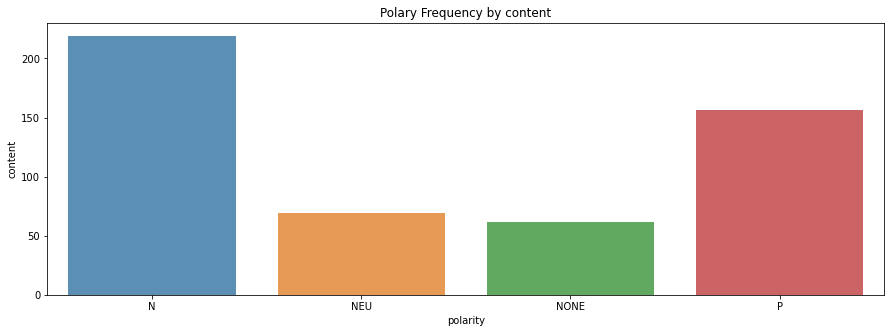

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(tweet_by_polarity['polarity'].values, tweet_by_polarity['content'].values, alpha=0.8)
plt.title('Polary Frequency by content')
plt.ylabel('content', fontsize=10)
plt.xlabel('polarity', fontsize=10)
plt.show()

In [20]:
def features_lexical(text):
    text_tokenizer = TweetTokenizer()
    tokens_text = text_tokenizer.tokenize(text)
    return tokens_text

In [22]:
for row in raw['content']:
    print(features_lexical(row))

['@noseashetero', '1000/10', 'de', 'verdad', 'a', 'ti', 'que', 'voy', 'a', 'decir', 'petarda', 'que', 'te', 'quiero', 'más', 'que', 'a', 'mí', 'mismo', '✨']
['@piscolabisaereo', '@HistoriaNG', '@SPosteguillo', 'las', 'tengo', 'pero', 'aún', 'no', 'las', 'he', 'leído', '.', 'Caerán', 'prontito']
['Al', 'final', 'han', 'sido', '3h', 'Bueno', ',', 'mañana', 'tengo', 'fiesta', 'así', 'que', '..', 'No', 'me', 'quejo']
['@Jorge_Ruiz14', 'yo', 'no', 'tengo', 'tiempo', 'para', 'esas', 'cosas', 'ahora', 'mismo']
['@_MissChaotic_', 'ves', 'ese', 'brillo', '?', 'es', 'un', 'coso', 'que', 'hace', 'que', 'se', 'sepan', 'a', 'kk']
['Tengo', 'una', 'perrina', 'adorable', '...', 'Sabéis', 'que', 'me', 'acompaña', 'hasta', 'la', 'a', 'habitación', 'cuando', 'me', 'voy', 'a', 'dormir', '?']
['@juankipua', 'Es', 'que', 'en', 'el', 'Ojeando', 'el', 'año', 'pasado', 'tampoco', ',', 'tiene', 'muchas', 'canciones', 'ya', 'jajajajaja']
['Bueno', ',', 'estoy', 'en', 'la', 'batalla', 'final', 'del', 'Conquista'

# Features
- numero de carateres por tuit
- promedio ponderado sde carateres por tuit  (#cartares/240)
- numero menciones 
- numero emojis
- numero de palabras
- numero de caracteres especiales